## Information
This Is The Code For House Price Prediction Machine Learning Model.<br>
The Model Is Trained On Delhi House Data.<br>
Link Of CSV File:- https://www.kaggle.com/datasets/saipavansaketh/pune-house-data?select=Delhi+house+data.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Loadind And Visualing The Data

In [2]:
DelhiDf = pd.read_csv("HouseData_Delhi.csv")

In [3]:
DelhiDf.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
DelhiDf.shape

(1259, 11)

In [5]:
DelhiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
DelhiDf.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [7]:
for column in DelhiDf.columns:
    print(DelhiDf[column].value_counts())
    print("*"*40)

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64
****************************************
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64
****************************************
2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64
****************************************
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64
****************************************
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                   

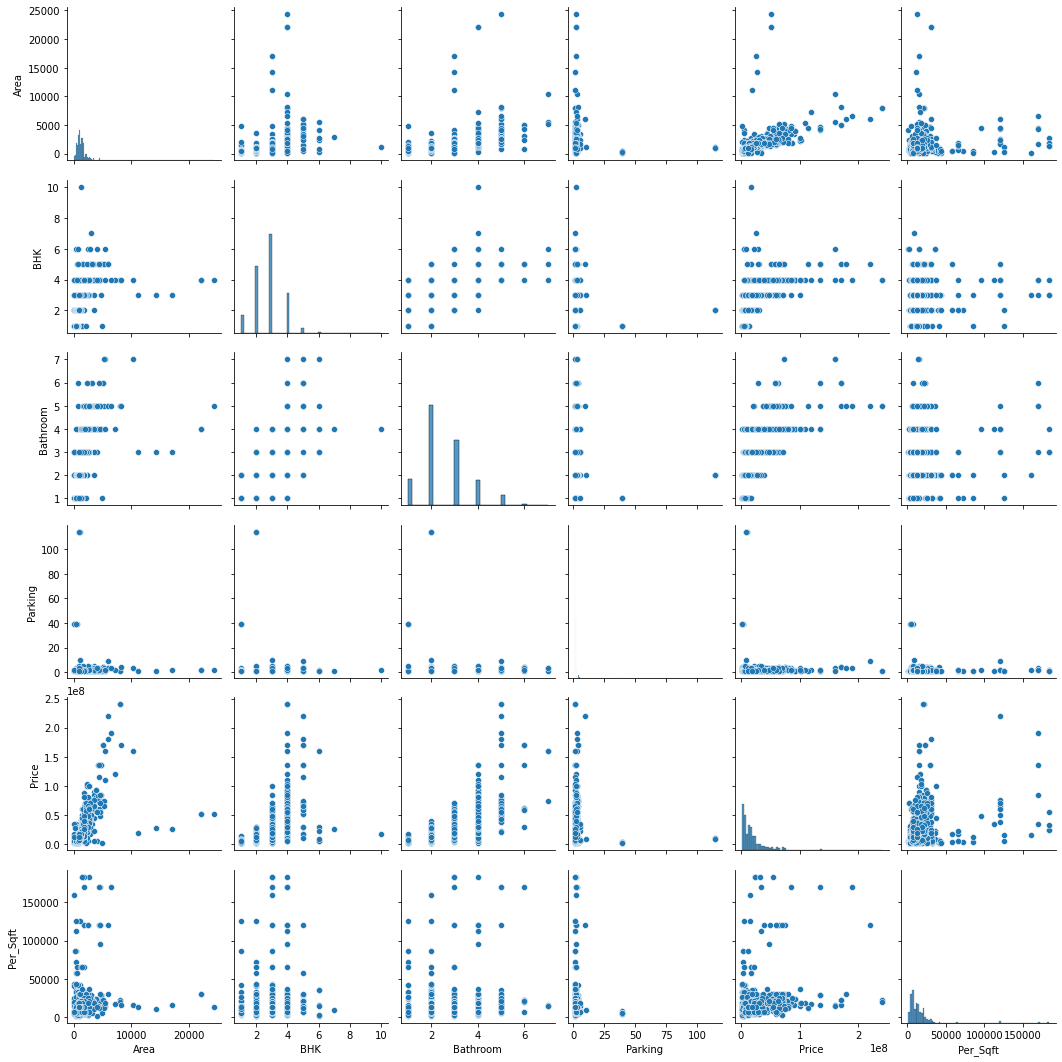

In [8]:
sns.pairplot(DelhiDf)

<AxesSubplot:>

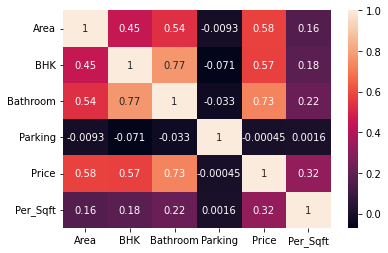

In [9]:
sns.heatmap(DelhiDf.corr(), annot=True)

## Modifying "Area" Column

In [10]:
DelhiDf.Area = round(DelhiDf.Area)

In [11]:
DelhiDf = DelhiDf[DelhiDf.Area >= 300]
DelhiDf = DelhiDf[DelhiDf.Area < 6000]

## Modifying "BHK" Column

In [12]:
def modifyBHK(row):
    if row.Area / row.BHK > 300:
        return row.BHK
    else:
        return 1
    
DelhiDf.BHK = DelhiDf.loc[:, ["Area", "BHK"]].apply(modifyBHK, axis=1) 

In [13]:
DelhiDf.BHK = DelhiDf.BHK.apply(lambda x: 5 if x > 5 else x)

## Modifying "Bathroom" Column

In [14]:
DelhiDf.Bathroom = DelhiDf['Bathroom'].fillna(2)

In [15]:
DelhiDf.Bathroom = DelhiDf.Bathroom.apply(lambda x: 5 if x > 5 else x)

## Modifying "Per_Sqft" Column

In [16]:
DelhiDf["Per_Sqft"] = DelhiDf.Price / DelhiDf.Area

## Modifying "Locality" Column

In [17]:
# There are many descriptive addresses, so we need to take address upto length of 85, rest will be ignored
DelhiDf.Locality = DelhiDf.Locality.apply(lambda x: x[:85] if len(x) > 85 else x)

In [18]:
# Many have the location written at the last so, we access that location
DelhiDf.Locality = DelhiDf.Locality.apply(lambda x: x.split(",")[-1].strip())

In [19]:
DelhiDf.Locality = DelhiDf.Locality.apply(lambda x: " ".join(x.split(" ")[:2]) if len(x.split(" ")) >= 3 else x)

In [20]:
def modify(x):
    res = x.split(" ")
    if not res[-1].isalpha() or (res[-1] != res[-1].title()) :
        res.remove(res[-1])
    return " ".join(res)
DelhiDf.Locality = DelhiDf.Locality.apply(modify)

In [21]:
names = ["Rohini", "Dwarka", "Narela", "Shahdara"]
def modifyLocationName(x):
    res = x.split(" ")[0]
    if res in names:
        return res
    elif x == "New Friends":
        return "New Friends Colony"
    elif x == "Commonwealth Games":
        return "Commonwealth Games Village"
    elif DelhiDf["Locality"].value_counts()[x] < 25 or x == '':
        return "Others"
    else:
        return x
DelhiDf.Locality = DelhiDf.Locality.apply(modifyLocationName)

## Dropping Unwanted Rows And Columns

In [22]:
# Removing record having outlier in "bhk" 
def removeOutlier_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("Locality"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("BHK"):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_Sqft),
                'std': np.std(bhk_df.Per_Sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("BHK"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
DelhiDf = removeOutlier_bhk(DelhiDf)

In [23]:
DelhiDf.drop(columns=["Furnishing", "Parking", "Status", "Transaction", "Type"], inplace=True)

In [24]:
DelhiDf.drop(columns=["Per_Sqft"], inplace=True)

In [25]:
# Modified till here

In [26]:
DelhiDf.isna().sum()

Area        0
BHK         0
Bathroom    0
Locality    0
Price       0
dtype: int64

In [27]:
DelhiDf.head()

,Area,BHK,Bathroom,Locality,Price
0,800.0,1.0,2.0,Rohini,6500000
2,950.0,2.0,2.0,Rohini,15500000
3,600.0,1.0,2.0,Rohini,4200000
4,650.0,2.0,2.0,Rohini,6200000
5,1300.0,4.0,3.0,Rohini,15500000


In [28]:
DelhiDf.describe()

,Area,BHK,Bathroom,Price
count,944.000000,944.000000,944.000000,9.440000e+02
mean,1314.966102,2.411017,2.501059,2.161736e+07
std,772.746744,1.092015,0.996281,2.240597e+07
min,300.000000,1.000000,1.000000,1.000000e+06
25%,800.750000,1.000000,2.000000,6.500000e+06
50%,1192.000000,3.000000,2.000000,1.550000e+07
75%,1620.000000,3.000000,3.000000,2.650000e+07
max,5500.000000,5.000000,5.000000,1.700000e+08


In [29]:
DelhiDf.Locality.unique()

array(['Rohini', 'Lajpat Nagar', 'Dwarka', 'Others', 'Patel Nagar',
       'Uttam Nagar', 'Greater Kailash', 'Okhla', 'Karol Bagh',
       'Vasant Kunj', 'New Friends Colony', 'Shahdara', 'Laxmi Nagar',
       'Saket', 'Safdarjung Enclave', 'Paschim Vihar',
       'Commonwealth Games Village', 'Alaknanda', 'Mehrauli',
       'Mahavir Enclave', 'Narela', 'Malviya Nagar', 'Dilshad Garden',
       'Vasundhara Enclave', 'Kirti Nagar', 'Sheikh Sarai',
       'Punjabi Bagh', 'Kalkaji', 'Hauz Khas', 'Chittaranjan Park'],
      dtype=object)

In [30]:
DelhiDf.Price = DelhiDf.Price.apply(lambda x: x / 100000)

## Cleaned Data

In [31]:
DelhiDf.rename(columns = {'Locality':'location', 'Area':'area', 'Bathroom':'bath', 'Price':'price', 'BHK':'bhk'}, 
              inplace = True)
DelhiDf.head()

,area,bhk,bath,location,price
0,800.0,1.0,2.0,Rohini,65.0
2,950.0,2.0,2.0,Rohini,155.0
3,600.0,1.0,2.0,Rohini,42.0
4,650.0,2.0,2.0,Rohini,62.0
5,1300.0,4.0,3.0,Rohini,155.0


In [32]:
# Saving the cleaned data as new CSV file
DelhiDf.to_csv("PureHouseData_Delhi.csv")

## Building The Model

In [33]:
X = DelhiDf.drop(columns=["price"])
y = DelhiDf["price"]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
print(X_train.shape)
print(X_test.shape)

(755, 4)
(189, 4)


In [37]:
columns_trains = make_column_transformer((OneHotEncoder(sparse=False), ["location"]), remainder="passthrough")

In [38]:
scaler = StandardScaler()

In [39]:
lr = LinearRegression()

In [40]:
pipe = make_pipeline(columns_trains, scaler, lr)

In [41]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [42]:
y_predict = pipe.predict(X_test)

In [43]:
# Accuracy of the model
round(r2_score(y_test, y_predict)*100, 2)

84.0

In [44]:
# Function to display the price in formatted form
def showFormattedPrice(price):
    price = price * 100000
    formatted_price = "₹{:,.2f}".format(price)
    return formatted_price

In [45]:
# Testing the model with custom data
area = 700
bhk = 3
bath = 2.0
location = "Rohini"
input_data = pd.DataFrame([[area, bhk, bath, location]], columns=["area", "bhk", "bath", "location"])
output_value = pipe.predict(input_data)[0]
print(showFormattedPrice(output_value))

₹4,475,848.18


## Saving The Model

In [46]:
import pickle

In [47]:
pickle.dump(pipe, open("TrainedModel_Delhi.pkl", "wb"))

## Loading The Trained Model

In [48]:
model = pickle.load(open("TrainedModel_Delhi.pkl", "rb"))

In [49]:
# Testing with custom data
input_data = pd.DataFrame([[700, 3, 1, "Dwarka"]], columns=["area", "bhk", "bath", "location"])
output_value = model.predict(input_data)[0]
print(showFormattedPrice(output_value))

₹-3,063,378.36
